In [164]:
import openpyxl
import csv 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")
#pulzia dati e creazione file csv
# def force_to_numeric(dataframe1, dataframe2, dataframe3):
#     cols = ['2023', '2022', '2021', '2020', '2019', '2018']
#     for i in cols:
#         if i not in dataframe1 or i not in dataframe2 or i not in dataframe3:
#             pass
#     dataframe1[cols] = dataframe1[cols].apply(pd.to_numeric, errors='coerce')
#     dataframe2[cols] = dataframe2[cols].apply(pd.to_numeric, errors='coerce')
#     dataframe3[cols] = dataframe3[cols].apply(pd.to_numeric, errors='coerce')
    
#     return dataframe1, dataframe2, dataframe3
def force_to_numeric(dataframe1, dataframe2, dataframe3):
    cols = ['2023', '2022', '2021', '2020', '2019', '2018']
    
    for col in cols:
        try:
            dataframe1[col] = pd.to_numeric(dataframe1[col], errors='coerce')
        except KeyError:
            pass  # Se la colonna non è presente in dataframe1, passa alla successiva

        try:
            dataframe2[col] = pd.to_numeric(dataframe2[col], errors='coerce')
        except KeyError:
            pass  # Se la colonna non è presente in dataframe2, passa alla successiva

        try:
            dataframe3[col] = pd.to_numeric(dataframe3[col], errors='coerce')
        except KeyError:
            pass  # Se la colonna non è presente in dataframe3, passa alla successiva
    
    return dataframe1, dataframe2, dataframe3




def column_remove(dataframe1, dataframe2, dataframe3):
    dataframe1 = dataframe1.iloc[:, :7]
    dataframe2 = dataframe2.iloc[:, :7]
    dataframe3 = dataframe3.iloc[:, :7]

    return dataframe1, dataframe2, dataframe3

def generate_overall_trend_correlation(df1: pd.DataFrame, df2: pd.DataFrame) -> None:
    """
    Calculates the correlation between the differences in values for each column of two input dataframes and prints the results.

    Args:
        df1 (pd.DataFrame): The first input dataframe.
        df2 (pd.DataFrame): The second input dataframe.

    Returns:
        None: The function only prints the correlation matrices for each column.
    """
    common_columns = df1.columns.intersection(df2.columns)
    for column in common_columns:
        diff_df1 = df1[column].diff().dropna()
        diff_df2 = df2[column].diff().dropna()

        merged_diff_df = pd.concat([diff_df1, diff_df2], axis=1)
        correlation = merged_diff_df.corr()
        print(f'Correlation in trend for {column}:\n', correlation)

def generate_yearly_correlations(df1: pd.DataFrame, df2: pd.DataFrame) -> None:
    """
    Calculates the correlation between columns of two input dataframes and prints the results.

    Args:
        df1 (pd.DataFrame): The first input dataframe.
        df2 (pd.DataFrame): The second input dataframe.

    Returns:
        None: The function only prints the correlation matrices for each common column.
    """
    common_columns = df1.columns.intersection(df2.columns)
    for column in common_columns:
        merged_df = pd.concat([df1[column], df2[column]], axis=1)
        correlation = merged_df.corr()
        print(f'Correlation for {column}:\n', correlation)




#education science and research
df_total_research_fundings = pd.read_excel("../data/education_science_research/total_research_funding.xlsx", skiprows=18)
df_men_research_fundings = pd.read_excel("../data/education_science_research/men_research_funding.xlsx", skiprows=18)
df_women_research_fundings = pd.read_excel("../data/education_science_research/women_research_funding.xlsx", skiprows=18)
df_total_research_fundings.to_csv("../data/education_science_research/total_research_funding.csv", index=False)
df_men_research_fundings.to_csv("../data/education_science_research/men_research_funding.csv", index=False)
df_women_research_fundings.to_csv("../data/education_science_research/women_research_funding.csv", index=False)


#environment and climate change
df_total_political_executives = pd.read_excel("../data/environment_climate_change/total_political_executives_climate.xlsx", skiprows=18)
df_men_political_executives = pd.read_excel("../data/environment_climate_change/men_political_executives_climate.xlsx", skiprows=18)
df_women_political_executives = pd.read_excel("../data/environment_climate_change/women_political_executives_climate.xlsx", skiprows=18)
df_total_political_executives.to_csv("../data/environment_climate_change/total_political_executives_climate.csv", index=False)
df_men_political_executives.to_csv("../data/environment_climate_change/men_political_executives_climate.csv", index=False)
df_women_political_executives.to_csv("../data/environment_climate_change/women_political_executives_climate.csv", index=False)


#major political party leaders
df_total_political_parties = pd.read_excel("../data/major_political_party_leaders/total_political_parties.xlsx", skiprows=18)
df_men_political_parties = pd.read_excel("../data/major_political_party_leaders/men_political_parties.xlsx", skiprows=18)
df_women_political_parties = pd.read_excel("../data/major_political_party_leaders/women_political_parties.xlsx", skiprows=18)
df_total_political_parties.to_csv("../data/major_political_party_leaders/total_political_parties.csv", index=False)
df_men_political_parties.to_csv("../data/major_political_party_leaders/men_political_parties.csv", index=False)
df_women_political_parties.to_csv("../data/major_political_party_leaders/women_political_parties.csv", index=False)



#public EU administrations
df_public_adm_total = pd.read_excel("../data/European_public_admin/european_agencies_total.xlsx", skiprows=18)
df_public_adm_men = pd.read_excel("../data/European_public_admin/european_agencies_men.xlsx", skiprows=18)
df_public_adm_women = pd.read_excel("../data/European_public_admin/european_agencies_women.xlsx", skiprows=18)
df_public_adm_total.to_csv("../data/European_public_admin/european_agencies_total.csv", index=False)
df_public_adm_men.to_csv("../data/European_public_admin/european_agencies_men.csv", index=False)
df_public_adm_women.to_csv("../data/European_public_admin/european_agencies_women.csv", index=False)


#european courts
df_total_european_court = pd.read_excel("../data/european_courts/total_judges_european_court.xlsx", skiprows=18)
df_men_european_court = pd.read_excel("../data/european_courts/men_judges_european_court.xlsx", skiprows=18)
df_women_european_court = pd.read_excel("../data/european_courts/women_judges_european_court.xlsx", skiprows=18)
df_total_european_court.to_csv("../data/european_courts/total_judges_european_court.csv", index=False)
df_men_european_court.to_csv("../data/european_courts/men_judges_european_court.csv", index=False)
df_women_european_court.to_csv("../data/european_courts/women_judges_european_court.csv", index=False)


#european finance
df_european_financial_institutions_total = pd.read_excel("../data/European_finance/european_financial_institutions_total.xlsx", skiprows=18)
df_european_financial_institutions_men = pd.read_excel("../data/European_finance/european_financial_institutions_men.xlsx", skiprows=18)
df_european_financial_institutions_women = pd.read_excel("../data/European_finance/european_financial_institutions_women.xlsx", skiprows=18)
df_european_financial_institutions_total.to_csv("../data/European_finance/european_financial_institutions_total.csv", index = False)
df_european_financial_institutions_men.to_csv("../data/European_finance/european_financial_institutions_men.csv", index= False)
df_european_financial_institutions_women.to_csv("../data/European_finance/european_financial_institutions_women.csv", index= False)

### Merging all dataset that share the Geographic region column

In [165]:
#pol parties
#environments
#research
df_women_research_fundings = df_women_research_fundings.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_political_executives = df_women_political_executives.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_political_parties = df_women_political_parties.rename(columns={"Geographic region\Time": "Geographic region"})
df_women_research_fundings, df_women_political_executives, df_women_political_parties = column_remove(df_women_research_fundings, df_women_political_executives, df_women_political_parties)
df_women_research_fundings, df_women_political_executives, df_women_political_parties = force_to_numeric(df_women_research_fundings, df_women_political_executives, df_women_political_parties)

merged_df = pd.merge(df_women_political_parties, df_women_research_fundings, on="Geographic region")
merged_df_final = pd.merge(merged_df, df_women_political_executives, on="Geographic region").fillna("0") #nella manipolazione dati abbiamo deciso di introdurre lo 0 al posto di NaN
merged_df_final.head()



,Geographic region,2023_x,2022_x,2021_x,2020_x,2019_x,2018_x,2023_y,2022_y,2021_y,2020_y,2019_y,2018_y,2022,2021,2020,2019,2018,2017
0,Albania,0,0,1,1,1,1,5,5,4,4,4,4,6,1,2,3,2,0
1,Austria,2,2,2,2,2,0,18,19,18,13,12,12,1,2,1,1,1,0.0
2,Bosnia and Herzegovina,0,0,0,0,0,0,4,4,4,3,3,3,2,2,1,0,0,0
3,Belgium,2,2,2,3,3,3,4,5,5,6,6,7,3,3,1,1,1,1.0
4,Bulgaria,1,1,1,1,1,1,6,6,5,5,4,4,3,4,3,3,2,2.0


### Spearman's correlation between variables in the merged dataset

In [166]:
# merged_df_final.corr().head()
spearman_corr = merged_df_final.corr(method='spearman')

spearman_corr
# spearman_corr = pd.DataFrame(spearman_corr)
# spearman_corr.hist()

,2023_x,2022_x,2021_x,2020_x,2019_x,2018_x,2023_y,2022_y,2021_y,2020_y,2019_y,2018_y,2022,2021,2020,2019,2018
2023_x,1.000000,0.954163,0.896823,0.870298,0.693090,0.645940,0.374805,0.435110,0.398453,0.404340,0.388177,0.393640,0.340778,0.414706,0.452449,0.409532,0.363895
2022_x,0.954163,1.000000,0.876656,0.867667,0.713015,0.637088,0.344821,0.396863,0.384073,0.381874,0.358363,0.370709,0.350832,0.413849,0.461233,0.440512,0.404881
2021_x,0.896823,0.876656,1.000000,0.949752,0.794230,0.682060,0.332182,0.398803,0.366289,0.367553,0.346971,0.343503,0.438973,0.459797,0.561961,0.564980,0.493357
2020_x,0.870298,0.867667,0.949752,1.000000,0.897829,0.771646,0.348001,0.417555,0.399838,0.406135,0.387995,0.389077,0.451420,0.498432,0.594794,0.583894,0.529976
2019_x,0.693090,0.713015,0.794230,0.897829,1.000000,0.841107,0.319698,0.373247,0.379114,0.356727,0.363855,0.345930,0.339161,0.444691,0.514041,0.492792,0.508522
2018_x,0.645940,0.637088,0.682060,0.771646,0.841107,1.000000,0.342385,0.387831,0.384262,0.400150,0.381615,0.371559,0.428724,0.495044,0.565646,0.516925,0.538421
2023_y,0.374805,0.344821,0.332182,0.348001,0.319698,0.342385,1.000000,0.979035,0.963170,0.931363,0.926211,0.933285,0.498863,0.424111,0.406089,0.307233,0.293033
2022_y,0.435110,0.396863,0.398803,0.417555,0.373247,0.387831,0.979035,1.000000,0.985786,0.969630,0.961388,0.964621,0.506425,0.467312,0.466857,0.357033,0.338873
2021_y,0.398453,0.384073,0.366289,0.399838,0.379114,0.384262,0.963170,0.985786,1.000000,0.981296,0.972068,0.974493,0.482819,0.472426,0.465531,0.352503,0.346932
2020_y,0.404340,0.381874,0.367553,0.406135,0.356727,0.400150,0.931363,0.969630,0.981296,1.000000,0.987163,0.986867,0.523659,0.504371,0.506110,0.383337,0.371276


### Dimostrazione della non linearità delle relazioni

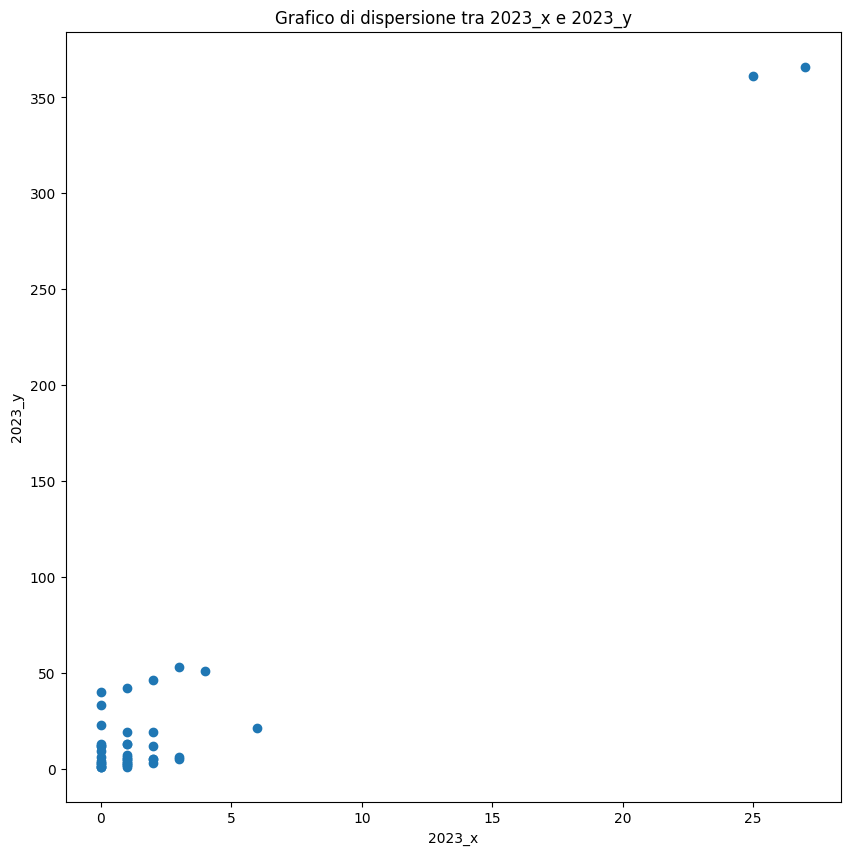

In [167]:
import matplotlib.pyplot as plt

# Creazione del grafico di dispersione
plt.figure(figsize=(10, 10))
plt.scatter(merged_df_final['2019_x'], merged_df_final['2022_y'])

# Aggiunta dei titoli agli assi e al grafico
plt.title('Grafico di dispersione tra 2023_x e 2023_y')
plt.xlabel('2023_x')
plt.ylabel('2023_y')

# Visualizzazione del grafico
plt.show()


### Heatmap of spearman's correlation for non linear variables

Se 2023_x, 2023_y e 2023 rappresentano il numero di donne in diversi ambiti nello stesso anno, allora la heatmap mostra come questi ambiti siano correlati tra loro nel tempo.

Correlazione tra gli stessi ambiti negli anni: Le celle con colori più caldi (come il rosso) lungo la diagonale indicano che c’è una forte correlazione positiva tra lo stesso ambito negli anni successivi. Questo suggerisce che se il numero di donne in un certo ambito aumenta o diminuisce in un anno, è probabile che segua un trend simile anche negli anni successivi.

Correlazione tra diversi ambiti nello stesso anno: Le celle che non sono sulla diagonale mostrano la correlazione tra diversi ambiti nello stesso anno. Ad esempio, la cella che incrocia 2023_x e 2023_y mostra la correlazione tra questi due ambiti nel 2023. Se il colore di questa cella è caldo, significa che se il numero di donne aumenta in un ambito (2023_x), è probabile che aumenti anche nell’altro ambito (2023_y), e viceversa.

Correlazione tra diversi ambiti negli anni: Le celle che non sono né sulla diagonale né nello stesso anno mostrano la correlazione tra diversi ambiti negli anni. Ad esempio, la cella che incrocia 2023_x e 2022_y mostra la correlazione tra l’ambito x nel 2023 e l’ambito y nel 2022. Se il colore di questa cella è freddo, significa che questi due ambiti non sono fortemente correlati tra loro nel tempo.

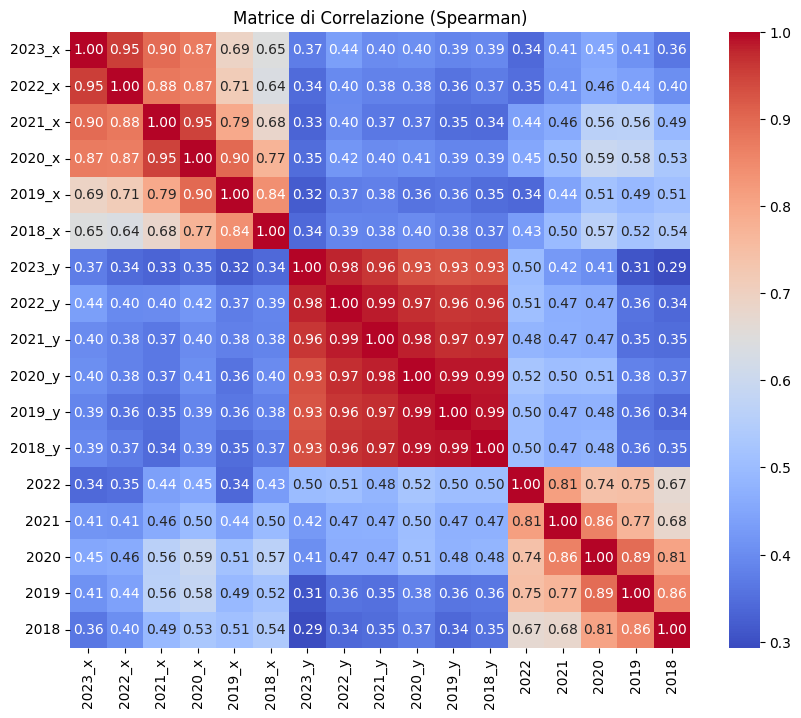

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione (Spearman)')
plt.show()


### Merging all datasets that share the Time column (renamed "Agency" column)

In [180]:
#public administration
#european court
#european finance

df_public_adm_women = df_public_adm_women.rename(columns={"Time":"Agency"})
df_women_european_court = df_women_european_court.rename(columns={"Time":"Agency"})
df_european_financial_institutions_women = df_european_financial_institutions_women.rename(columns={"Time":"Agency"})


df_public_adm_women, df_women_european_court, df_european_financial_institutions_women = column_remove(df_public_adm_women, df_women_european_court, df_european_financial_institutions_women)
df_public_adm_women, df_women_european_court, df_european_financial_institutions_women = force_to_numeric(df_public_adm_women, df_women_european_court, df_european_financial_institutions_women)
# print(df_public_adm_women.head())
# print(df_european_financial_institutions_women.head())
# print(df_women_european_court.head())
merged_df2 = pd.merge(df_public_adm_women, df_women_european_court, on="Agency", how='outer')
merged_df_final2 = pd.merge(merged_df2, df_european_financial_institutions_women, on="Agency", how="outer") #nella manipolazione dati abbiamo deciso di introdurre lo 0 al posto di NaN
merged_df_final2 = merged_df_final2.drop(merged_df_final2.index[[0, 1]]).fillna(merged_df_final2.mean())
merged_df_final2.head()

,Agency,2023_x,2022_x,2021_x,2020_x,2019_x,2018_x,2023_y,2022_y,2021_y,2020_y,2019_y,2018_y,2023,2022,2021,2020,2019,2018
2,Agency for the Cooperation of Energy Regulator...,8.0,7.000000,7.000000,6.000000,8.000000,7.000000,16.25,14.75,15.0,14.0,11.75,11.75,6.0,6.0,5.0,4.0,3.5,4.5
3,Body of European Regulators for Electronic Com...,7.0,9.000000,8.000000,6.000000,5.000000,4.000000,16.25,14.75,15.0,14.0,11.75,11.75,6.0,6.0,5.0,4.0,3.5,4.5
4,Community Plant Variety Office (CPVO),10.0,12.000000,13.000000,12.000000,11.000000,13.000000,16.25,14.75,15.0,14.0,11.75,11.75,6.0,6.0,5.0,4.0,3.5,4.5
5,Euratom Supply Agency (ESA),24.5,23.435897,22.923077,23.692308,22.789474,22.842105,16.25,14.75,15.0,14.0,11.75,11.75,6.0,6.0,5.0,4.0,3.5,4.5
6,European Agency for Reconstruction (EAR),24.5,23.435897,22.923077,23.692308,22.789474,22.842105,16.25,14.75,15.0,14.0,11.75,11.75,6.0,6.0,5.0,4.0,3.5,4.5


In [181]:
spearman_corr2 = merged_df_final2.corr(method='spearman')

print(spearman_corr2)

          2023_x    2022_x    2021_x    2020_x    2019_x    2018_x    2023_y  \
2023_x  1.000000  0.910817  0.875046  0.773182  0.761754  0.769340  0.155512   
2022_x  0.910817  1.000000  0.947577  0.853800  0.830662  0.837397  0.141751   
2021_x  0.875046  0.947577  1.000000  0.856656  0.843915  0.844329  0.151133   
2020_x  0.773182  0.853800  0.856656  1.000000  0.973092  0.959315  0.141699   
2019_x  0.761754  0.830662  0.843915  0.973092  1.000000  0.977362  0.137316   
2018_x  0.769340  0.837397  0.844329  0.959315  0.977362  1.000000  0.137316   
2023_y  0.155512  0.141751  0.151133  0.141699  0.137316  0.137316  1.000000   
2022_y  0.155512  0.141751  0.151133  0.141699  0.137316  0.137316  1.000000   
2021_y  0.155527  0.141765  0.151147  0.141712  0.137329  0.137329  0.999904   
2020_y  0.155512  0.141751  0.151133  0.141699  0.137316  0.137316  0.999616   
2019_y  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.509992   
2018_y  0.000000  0.000000  0.000000  0.

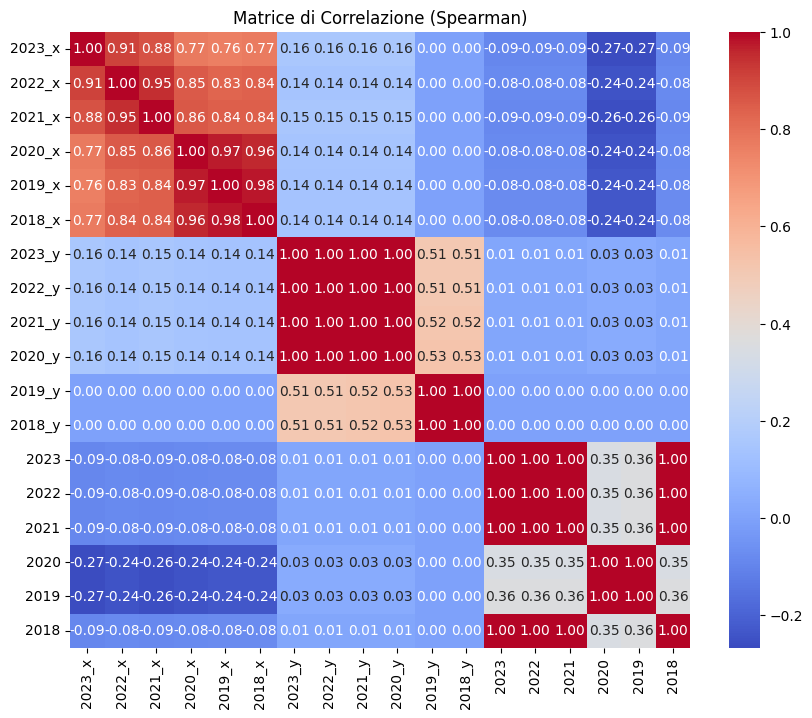

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione (Spearman)')
plt.show()

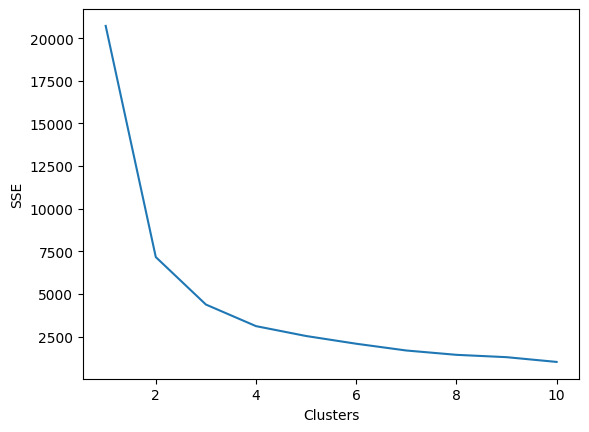

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import cluster
# cols = ['2023', '2022', '2021', '2020', '2019', '2018']
# df_public_adm_women[cols] = df_public_adm_women[cols].apply(pd.to_numeric, errors='coerce')
# df_women_research_fundings = df_women_research_fundings.dropna()
merged_df_final2 = merged_df_final2.fillna(merged_df_final2.mean())
# df_women_research_fundings = df_women_research_fundings.reset_index(drop=True)
merged_df_final2 = merged_df_final2.reset_index(drop=True)
# X = df_women_research_fundings.iloc[:,1:].values
X = merged_df_final2.iloc[:,1:].values

# Apply elbow method to understand the number of cluster

wcss = []
for i in range(1,11):
    k_means = cluster.KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_) 

plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [179]:
from sklearn.cluster import KMeans
import pandas as pd

# Supponiamo che 'df' sia il tuo DataFrame
# Elimina le righe con valori NaN
merged_df_final2 = merged_df_final2.fillna(merged_df_final2.mean())


# Seleziona le colonne numeriche per l'analisi dei cluster
data = merged_df_final2.select_dtypes(include=[np.number])

# Inizializza l'algoritmo KMeans con il numero desiderato di cluster
kmeans = KMeans(n_clusters=4)

# Adatta l'algoritmo ai tuoi dati
kmeans.fit(data)

# Ottieni le etichette dei cluster per ciascuna riga nel DataFrame
labels = kmeans.labels_

# Aggiungi le etichette dei cluster al DataFrame originale
merged_df_final2['Cluster'] = labels
labels
cluster_means = merged_df_final2.groupby('Cluster').mean()
cluster_means


,2023_x,2022_x,2021_x,2020_x,2019_x,2018_x,2023_y,2022_y,2021_y,2020_y,2019_y,2018_y,2023,2022,2021,2020,2019,2018
Cluster,,,,,,,,,,,,,,,,,,
0,6.866667,5.800000,5.600000,5.266667,5.600000,5.400000,16.25,14.75,15.0,14.0,11.75,11.75,4.0,4.0,3.333333,2.666667,2.333333,3.0
1,39.666667,38.333333,39.333333,38.000000,37.333333,37.000000,16.25,14.75,15.0,14.0,11.75,11.75,4.0,4.0,3.333333,2.666667,2.333333,3.0
2,11.663248,11.379825,11.114912,11.545614,10.874775,11.189189,16.25,14.75,15.0,14.0,11.75,11.75,4.0,4.0,3.333333,2.666667,2.333333,3.0
3,18.800000,18.800000,17.600000,21.000000,19.600000,18.800000,16.25,14.75,15.0,14.0,11.75,11.75,4.0,4.0,3.333333,2.666667,2.333333,3.0


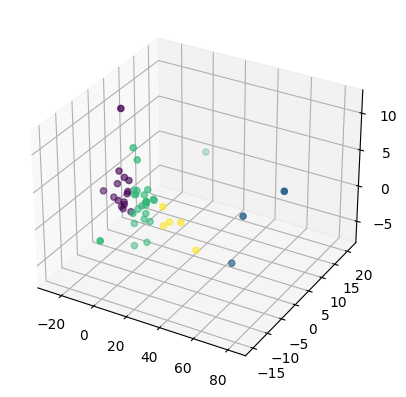

In [183]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Riduci la dimensionalità dei tuoi dati a 3 dimensioni utilizzando PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(data)

# Crea una nuova figura
fig = plt.figure()

# Aggiungi un grafico 3D alla figura
ax = fig.add_subplot(111, projection='3d')

# Assegna a x, y, e z le tre componenti principali
x = reduced_data[:, 0]
y = reduced_data[:, 1]
z = reduced_data[:, 2]

# Crea un grafico a dispersione 3D utilizzando le etichette dei cluster per colorare i punti
scatter = ax.scatter(x, y, z, c=labels)

# Mostra il grafico
plt.show()


In [172]:
# # Calcola la somma totale per ogni ente
# merged_df_final2['Total'] = merged_df_final2.sum(axis=1)

# # Ordina il DataFrame in base alla somma totale
# df_sorted_final_2 = merged_df_final2.sort_values(by='Total', ascending=False)

# # Plotta la distribuzione totale
# df_sorted_final_2.plot(kind='bar', x='Agency', y='Total', figsize=(12, 8))
# plt.title('Distribuzione totale del numero di donne in ruoli influenti per ente/agenzia')
# plt.xlabel('Ente/Agenzia')
# plt.ylabel('Numero totale di donne')
# plt.show()



# # # Verifica colonne vuote o con tutti zeri
# # empty_columns = merged_df_final2.columns[merged_df_final2.eq(0).all() | merged_df_final2.isna().all()]

# # # Stampa le colonne vuote o con tutti zeri
# # print("Colonnes vuote o con tutti zeri:", empty_columns)
# # # Rimuovi colonne vuote o con tutti zeri
# # merged_df_final2 = merged_df_final2.drop(empty_columns, axis=1)

# # # Calcola la correlazione di Spearman
# # spearman_corr2 = merged_df_final2.corr(method='spearman')

# # print(spearman_corr2)



In [173]:
# # Seleziona un sottoinsieme di enti per il confronto
# enti_da_confrontare = df_sorted_final_2["Agency"]

# # Seleziona solo le colonne degli anni di interesse
# cols = ['2023', '2022', '2021', '2020', '2019', '2018']

# # Filtra il DataFrame solo per gli enti di interesse e le colonne di interesse
# df_selected = df_sorted_final_2[['Agency'] + cols]

# # Plotta il confronto tra enti
# df_selected.plot(kind='bar', x='Agency', y=cols, figsize=(12, 8))
# plt.title('Confronto tra il numero di donne in ruoli influenti per ente/agenzia')
# plt.xlabel('Ente/Agenzia')
# plt.ylabel('Numero di donne')
# plt.show()
